# HW2

Submitted by:
Lior Sukman (ID 319124244)
Efrat Kohen (ID 300385564)
Mandy Rosemblaum (ID 305747230)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix, plot_confusion_matrix
from math import sqrt

In [2]:
df = pd.read_csv('journal.pone.0234552.s004.csv',index_col=0)

In [3]:
df

,BMI,RFM,AFM,SMM,Waist circumference,Weight_value-1,Height_value-1,Visc,Body height,Head height,...,Volume Hand Right,Volume Thigh Left,Volume Thigh Right,Volume Lower Leg Left,Volume Lower Leg Right,Volume Foot Left,Volume Foot Right,Volume Chest,Volume Belly,Volume Hip
N,,,,,,,,,,,,,,,,,,,,,
1,20.13,5.66,3.89,30.95,0.80,68.60,1.85,0.17,184.0,24.8,...,0.466,5.926,5.739,2.878,2.841,1.264,1.223,17.816,6.020,14.146
2,18.35,9.79,5.30,22.65,0.71,54.10,1.72,0.46,170.8,24.1,...,0.329,5.106,5.066,2.064,2.071,0.947,0.921,13.792,4.477,10.860
3,22.11,9.63,6.31,29.26,0.76,65.55,1.72,0.38,171.5,23.7,...,NaN,5.850,6.040,2.478,2.489,1.075,1.037,22.283,6.479,12.007
4,20.46,11.11,8.03,31.08,0.85,72.25,1.88,0.91,187.6,25.1,...,0.319,6.734,6.809,2.959,2.961,1.028,1.035,20.314,10.700,11.533
5,24.58,24.03,16.10,24.53,0.82,67.00,1.65,1.17,164.1,23.5,...,0.263,6.422,6.383,3.094,3.079,0.990,0.995,18.031,7.530,13.261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,21.73,12.38,8.57,29.82,0.74,69.25,1.78,0.01,178.0,23.7,...,0.328,7.299,7.378,2.937,2.966,1.049,1.026,18.104,6.148,11.833
101,19.90,7.49,4.44,26.33,0.70,59.35,1.73,0.34,172.3,24.8,...,0.311,5.605,5.824,2.603,2.590,1.050,1.025,14.611,5.199,10.883
102,18.24,9.17,5.05,23.50,0.72,55.10,1.74,0.44,174.0,23.6,...,0.355,4.919,5.282,2.178,2.212,1.048,1.022,15.218,5.088,11.208


In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 176 columns):
BMI                                                  104 non-null float64
RFM                                                  104 non-null float64
AFM                                                  104 non-null float64
SMM                                                  104 non-null float64
Waist circumference                                  104 non-null float64
Weight_value-1                                       104 non-null float64
Height_value-1                                       104 non-null float64
Visc                                                 104 non-null float64
Body height                                          104 non-null float64
Head height                                          104 non-null float64
Neck height                                          104 non-null float64
Distance neck to buttock                             104 non-null float64
Distan

## Q1

In [5]:
#Build DF of the required columns
data = df[['Visc','BMI','Waist circumference', 'Height_value-1']]
data.insert(0, 'WHtR', data.loc[:,'Waist circumference']/df.loc[:,'Height_value-1'])
data = data.drop(columns=['Height_value-1'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 4 columns):
WHtR                   104 non-null float64
Visc                   104 non-null float64
BMI                    104 non-null float64
Waist circumference    104 non-null float64
dtypes: float64(4)
memory usage: 4.1 KB


In [6]:
data

,WHtR,Visc,BMI,Waist circumference
N,,,,
1,0.432432,0.17,20.13,0.80
2,0.412791,0.46,18.35,0.71
3,0.441860,0.38,22.11,0.76
4,0.452128,0.91,20.46,0.85
5,0.496970,1.17,24.58,0.82
...,...,...,...,...
100,0.415730,0.01,21.73,0.74
101,0.404624,0.34,19.90,0.70
102,0.413793,0.44,18.24,0.72


a. Train a Linear Regression model which predicts "Visc" from "BMI", "Waist circumference"
and WHtR ("Waist circumference"/"Height_value-1").

In [7]:
def split_df (target_name: str, data: pd.DataFrame):
    """ 
    Split df into random train and test subsets based on target name column

    Parameters
    ----------
    target_name : str
        target column name
    data : DataFrame
        DataFrame  

    return
    ----------
    X_train, X_test, y_train, y_test
    """
    X = data.drop(columns=[target_name])
    y = data[target_name].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [8]:
target_name = "Visc"
X_train, X_test, y_train, y_test = split_df(target_name, data)
reg = LinearRegression().fit(X_train, y_train)
y_predicted = reg.predict(X_test)

b. Report the root mean squared prediction error (RMSE) on the test set.

In [9]:
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print(f"The root mean squared prediction error (RMSE) on the test set is {rmse}.")

The root mean squared prediction error (RMSE) on the test set is 0.3130062066278458.


c. Report the estimated coefficient's values.

In [10]:
reg.coef_ #coefficients of the model (without intercept)

array([ 4.51595018, -0.07687255,  9.80077941])

In [11]:
reg.intercept_ #intercept of the model

-7.336890748571133

d. Plot a scatter plot of the predicted target variable v.s. the actual target variable based on
the test set

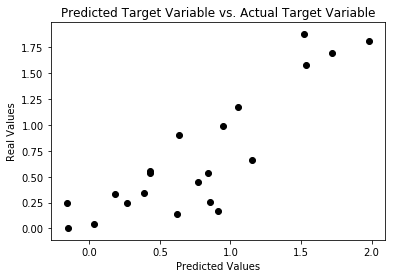

In [12]:
_=plt.scatter(y_predicted, y_test, color="black")
_=plt.title('Predicted Target Variable vs. Actual Target Variable')
_=plt.ylabel("Real Values")
_=plt.xlabel("Predicted Values")

## Q2

a. Train a Linear Regression model which predicts "Visc" from "BMI", "Waist circumference" and WHtR ("Waist circumference"/"Height_value-1").

In [13]:
data2 = data.drop(columns=[target_name])
columns = data2.columns
y = data[target_name].copy()
i=0
print(columns)
for col in columns:
    if i==0:
        join = pd.concat([y,pd.get_dummies(pd.qcut(data2[col],4), drop_first=True)],axis=1)
    else:
        join = pd.concat([join,pd.get_dummies(pd.qcut(data2[col],4), drop_first=True)],axis=1)
    i=i+1
X_train, X_test, y_train, y_test = split_df(target_name, join) #target_name = 'Visc'
reg = LinearRegression().fit(X_train, y_train)
y_predicted = reg.predict(X_test)

Index(['WHtR', 'BMI', 'Waist circumference'], dtype='object')


b. Report the root mean squared prediction error (RMSE) on the test set.

In [14]:
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print(f"The root mean squared prediction error (RMSE) on the test set is {rmse}.")

The root mean squared prediction error (RMSE) on the test set is 0.32589631309766176.


c. Report the estimated coefficient's values.

In [15]:
reg.coef_ #coefficients of the model (without intercept)

array([ 0.08030516,  0.25181125,  0.64453197, -0.17614824, -0.19818875,
        0.0110404 ,  0.0093602 ,  0.26553151,  1.25505678])

In [ ]:
reg.intercept_ #intercept of the model

d. Plot a scatter plot of the predicted target variable v.s. the actual target variable based on the test set

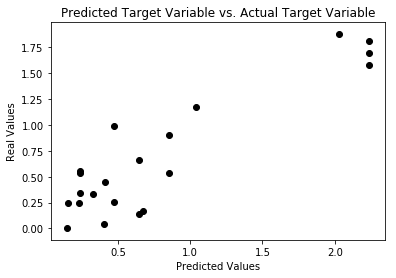

In [16]:
_=plt.scatter(y_predicted, y_test, color="black")
_=plt.title('Predicted Target Variable vs. Actual Target Variable')
_=plt.ylabel("Real Values")
_=plt.xlabel("Predicted Values")

# Q3

a. Plot a sctter plot of Visc v.s. WC

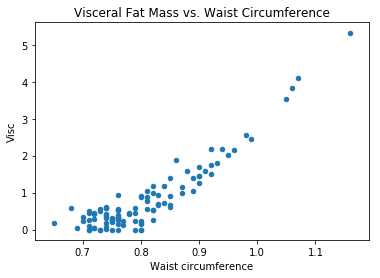

In [17]:
data.plot.scatter(x='Waist circumference', y='Visc')
_=plt.title('Visceral Fat Mass vs. Waist Circumference')

b. Define two new variables wc1 and wc2 (explanation in instruction's pdf) and train a linear regression model (explanation in instruction's pdf)

In [18]:
data3 = data[['Visc','Waist circumference']].copy()

wc = data3['Waist circumference']
wc1 = wc - 0.78 #calc wc1
wc2 = np.where(wc < 0.78, 0, 1) #calc wc2
new_var = wc1 * wc2 #calc the new variable

data3.insert(0, 'new_var', new_var)

X_train, X_test, y_train, y_test = split_df(target_name, data3) #target_name = 'Visc'

reg = LinearRegression().fit(X_train, y_train) #fit linear regression model
pred = reg.predict(X_test) #get predictions

c. Plot the a scatter plot of the predictions on the test set.

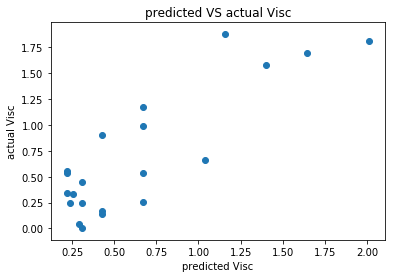

In [19]:
#plot a scatter graph of the results
plt.scatter(x = pred, y = y_test)
_=plt.title('predicted VS actual Visc')
_=plt.xlabel('predicted Visc')
_=plt.ylabel('actual Visc')

# Q4

a.Transform the "Visc" variable to a binary variable (with the value "1" if greater than the
median and "0" otherwise).

In [20]:
visc_median = data.Visc.median()
data4 = data[['BMI','Waist circumference', 'WHtR', 'Visc']].copy()
data4['Visc'] = np.where(data['Visc']>visc_median, 1, 0)

b. Train a Logistic regression model using BMI, WC and WHtR as predictors.


In [21]:
LX_train, LX_test, Ly_train, Ly_test = split_df(target_name, data4) #target_name = 'Visc'

Lreg = LogisticRegression().fit(LX_train, Ly_train) 
Ly_predicted = Lreg.predict(LX_test)

c. Report the AUC on the test set.


In [22]:
fpr, tpr, thresholds = metrics.roc_curve(Ly_test, Ly_predicted)
print('The AUC is:', metrics.auc(fpr, tpr))

The AUC is: 0.7636363636363637


d. Based on a 0.5 threshold, print the confusion matrix, the sensitivity and specificity on the
test set.

confusion matrix:


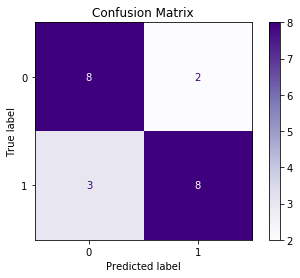

In [23]:
confusion_matrix(Ly_test, Ly_predicted)

conf_matrix = confusion_matrix(Ly_test, Ly_predicted)
print('confusion matrix:')

disp = plot_confusion_matrix(Lreg,
                             LX_test,
                             Ly_test,
                             cmap=plt.cm.Purples)
_ = disp.ax_.set_title("Confusion Matrix")

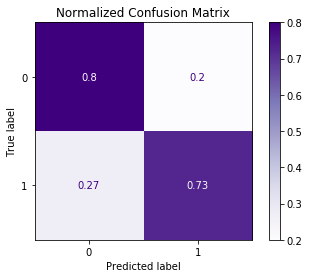

In [24]:
disp = plot_confusion_matrix(Lreg,
                             LX_test,
                             Ly_test,
                             cmap=plt.cm.Purples,
                             normalize="true")
_ = disp.ax_.set_title("Normalized Confusion Matrix")

In [25]:
#sensitivity: TP/(TP+FN)
#specificity: TN/(TN+FP)

TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)


In [26]:
print('The sensitivity is:', sensitivity)
print('The specificity is:', specificity)

The sensitivity is: 0.7272727272727273
The specificity is: 0.8
